In [ ]:
import os
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
ROOT = './data'
CLASS_NAMES = sorted(os.listdir(f'{ROOT}/train'))

len(CLASS_NAMES)

60

In [ ]:
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    image_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        image_path.append(path)
    image_path = np.array(image_path)
    return images_np, image_path

In [ ]:
# Tính đô tương đồng sử dụng hàm L1 
def absolute_difference(query, data):
    axis_bath_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(query - data), axis=axis_bath_size)

In [ ]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAMES:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

    return query, ls_path_score

In [ ]:
def plot_results(query_path, ls_path_score, reverse=False):
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    ls_path_score.sort(key=lambda x: x[1], reverse=reverse)

    ls_path_score.insert(0, (query_path, 0))

    for i in range(0, 6):
        path, score = ls_path_score[i]
        im = Image.open(path)
        axes[i//3, i%3].imshow(im)
        axes[i//3, i%3].set_title(f'Top {i}: {os.path.dirname(path).split("/")[-1]}')
        axes[i//3, i%3].axis('off')
    plt.show()

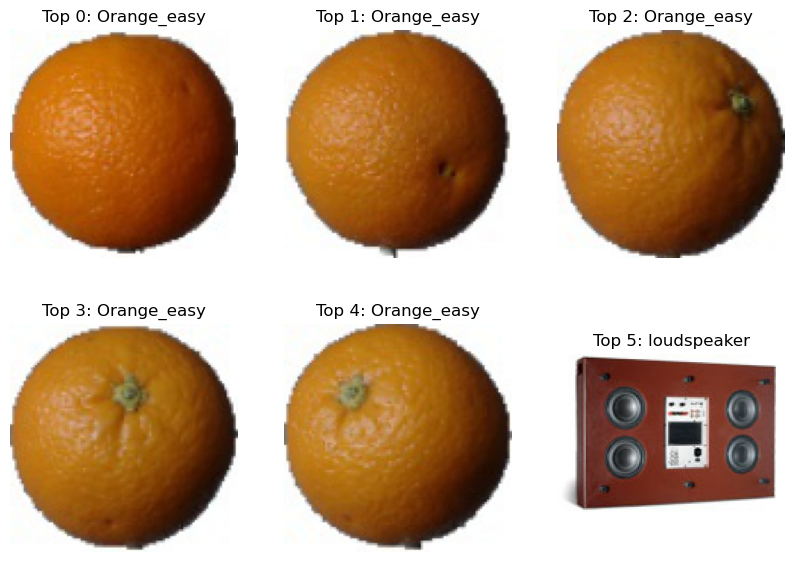

In [ ]:
root_img_path = f'{ROOT}/train/'
query_path = f'{ROOT}/test/Orange_easy/0_100.jpg'
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)

plot_results(query_path, ls_path_score, reverse=False)


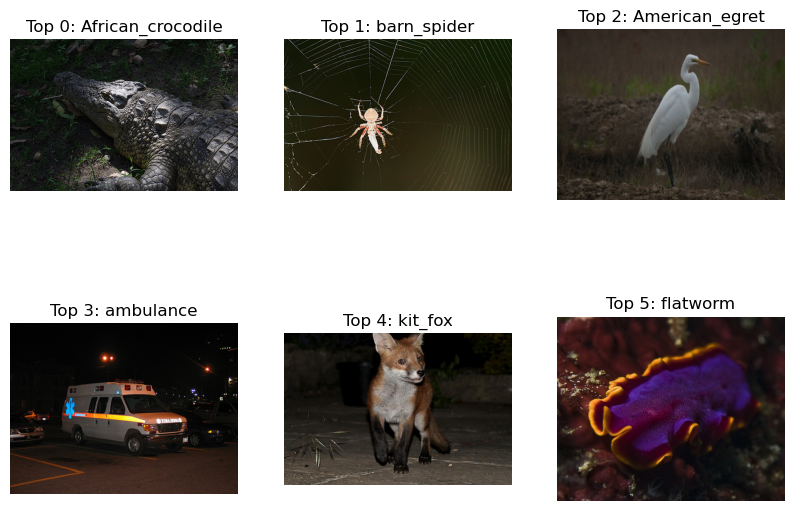

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [ ]:
def mean_square_difference(query, data):
    axis_bath_size = tuple(range(1, len(data.shape)))
    return np.mean((data - query) ** 2, axis=axis_bath_size)

In [ ]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []

    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAMES:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)

            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

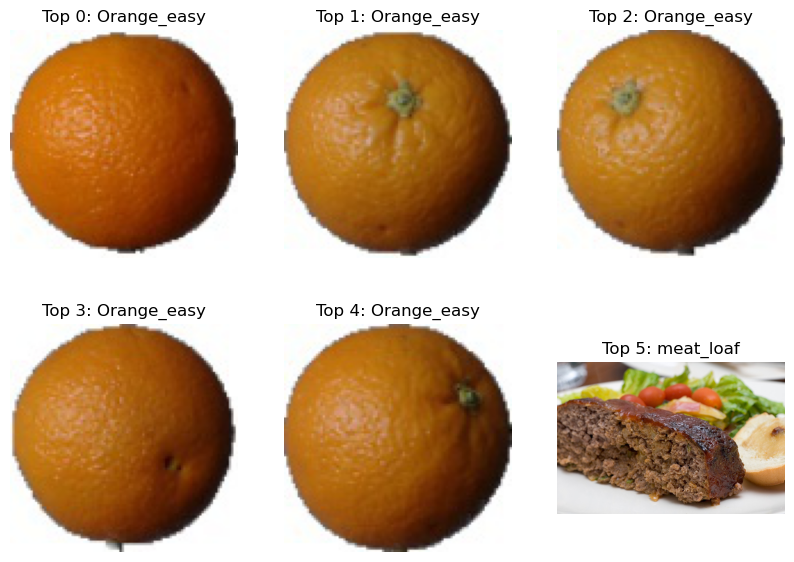

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)



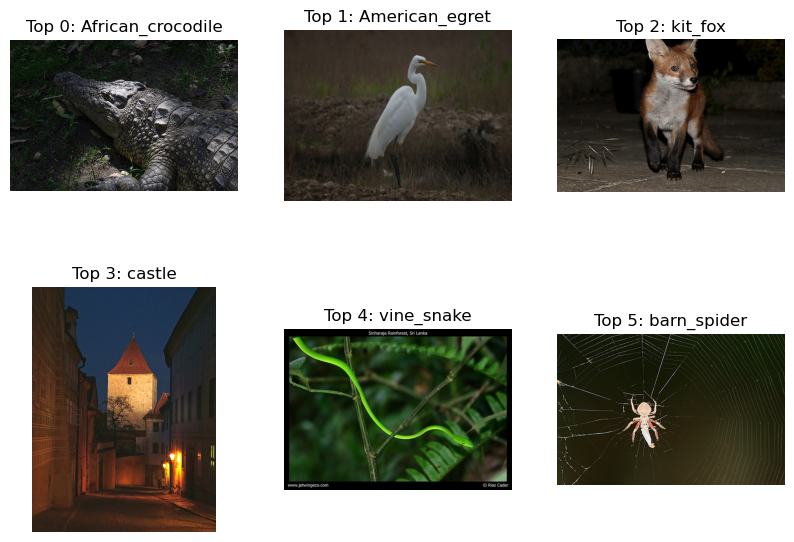

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [ ]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [ ]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAMES:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

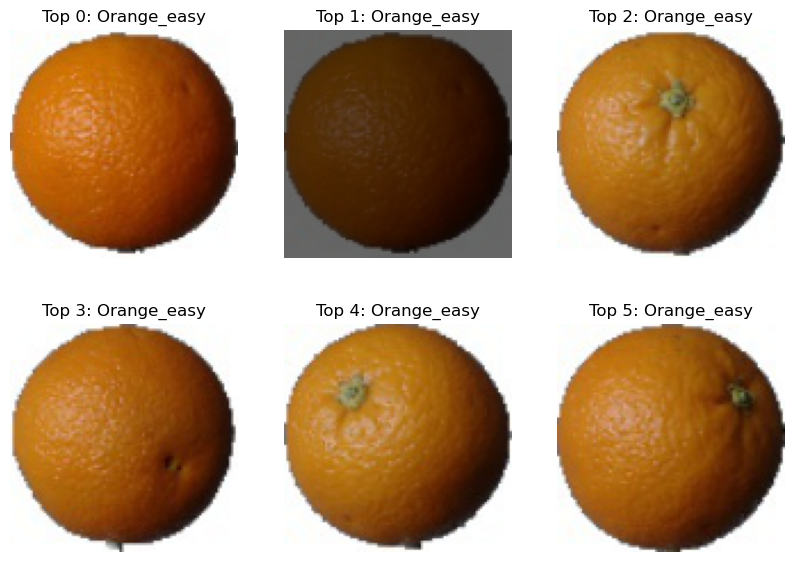

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

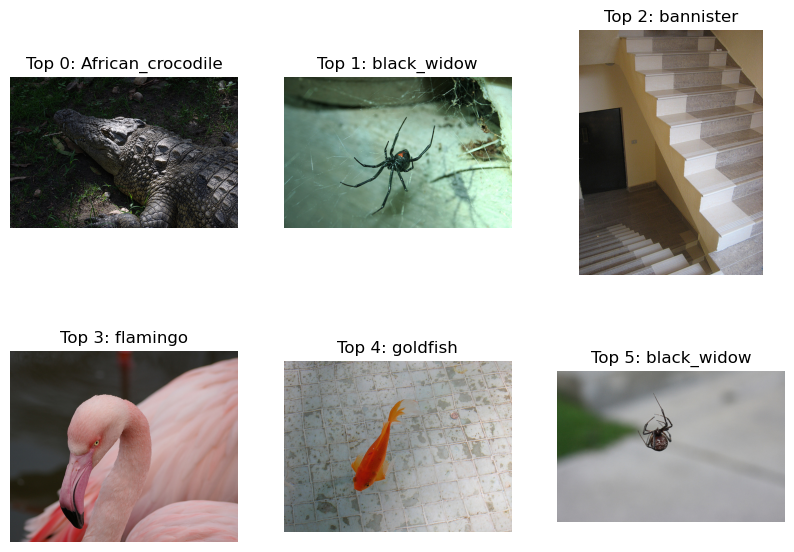

In [ ]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [ ]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)

    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

    correlation = np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

    return correlation


In [ ]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAMES:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

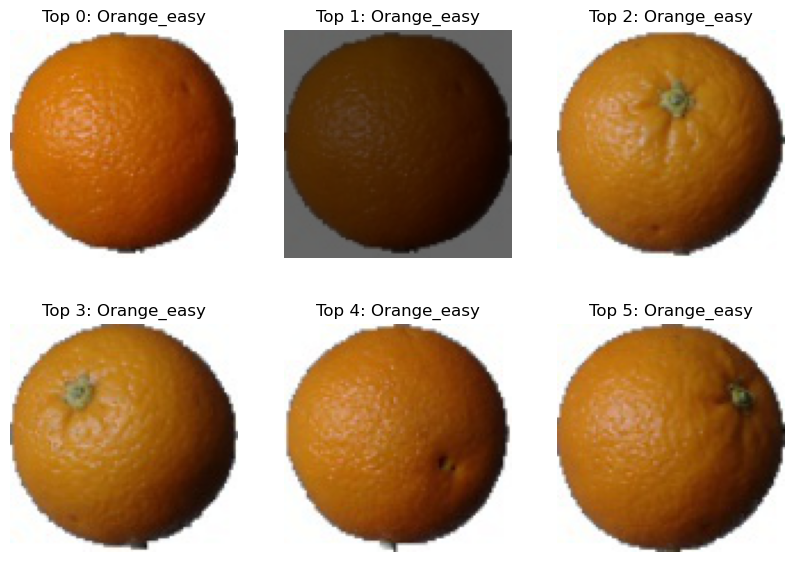

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

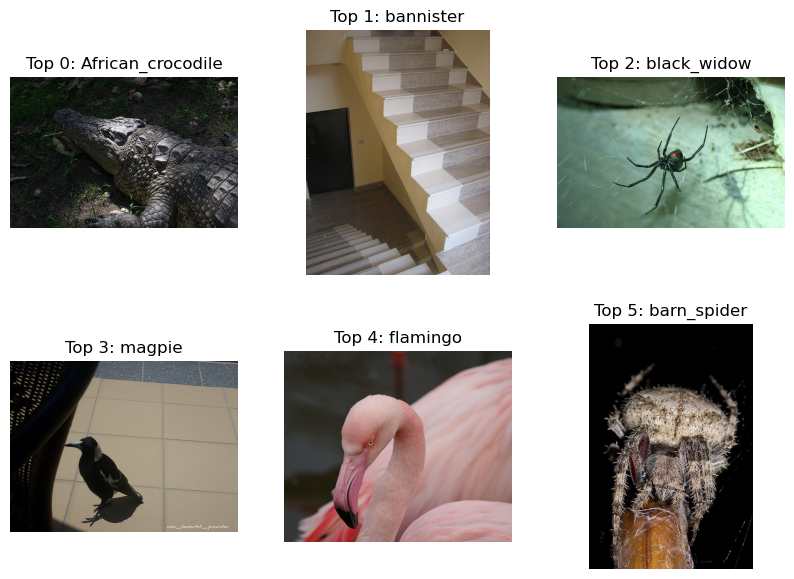

In [ ]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)